# Phase 2 — Dimensionality Reduction with PCA


In [23]:
#  Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [24]:
#  Loading the cleaned dataset from Google Drive


from google.colab import drive
drive.mount('/content/drive')


path = "/content/drive/MyDrive/heart_disease_cleaned.csv.csv"


df = pd.read_csv(path)


X = df.drop(columns=["target"])
y = df["target"]

print("Dataset shape:", X.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (303, 25)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,target
0,0.948726,0.686202,0.757525,-0.264900,2.394438,0.017197,-0.696631,1.087338,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.392002,0.686202,1.611220,0.760415,-0.417635,-1.821905,1.435481,0.397182,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
2,1.392002,0.686202,-0.665300,-0.342283,-0.417635,-0.902354,1.435481,1.346147,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.932564,0.686202,-0.096170,0.063974,-0.417635,1.637359,-0.696631,2.122573,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.489288,-1.457296,-0.096170,-0.825922,-0.417635,0.980537,-0.696631,0.310912,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [25]:
#  Apply PCA to reduce dimensionality
n_components = X.shape[1]  # using all features
pca = PCA(n_components=n_components, random_state=42)
pcs = pca.fit_transform(X)

# Explained variance ratio
explained_ratio = pca.explained_variance_ratio_
cumulative = np.cumsum(explained_ratio)

print("Explained variance ratio (first 5):", explained_ratio[:5])


Explained variance ratio (first 5): [0.22018212 0.13585228 0.10478539 0.0824401  0.07840698]


In [26]:
# Determine how many components are needed for 90% and 95% variance
def components_for_threshold(cumvar, thresh):
    idx = np.where(cumvar >= thresh)[0]
    return int(idx[0]) + 1 if len(idx) > 0 else len(cumvar)

comp_90 = components_for_threshold(cumulative, 0.90)
comp_95 = components_for_threshold(cumulative, 0.95)

print(f"Components for 90% variance: {comp_90}")
print(f"Components for 95% variance: {comp_95}")


Components for 90% variance: 12
Components for 95% variance: 14


In [27]:
#  Creating a PCA-transformed dataset
pc_cols = [f"PC{i+1}" for i in range(pcs.shape[1])]
df_pca = pd.DataFrame(pcs, columns=pc_cols)
df_pca["target"] = y.values

# Save to file
df_pca.to_csv("data/pca_transformed.csv", index=False)

df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,target
0,-1.033690,-0.765290,2.597718,-0.503471,0.175393,-0.045520,1.262838,0.413915,0.322586,-0.491135,...,1.211050,0.387281,0.063534,-0.075271,6.106227e-16,-8.326673e-17,3.330669e-16,3.608225e-16,-7.771561e-16,0
1,-2.976400,-0.573507,-0.279101,0.159343,0.049652,0.629038,-1.228759,0.779190,-0.192386,-0.885766,...,-0.341200,0.701699,0.274415,-0.071625,0.000000e+00,1.942890e-16,2.220446e-16,-2.498002e-16,0.000000e+00,2
2,-2.628524,1.085539,-0.537932,-0.229184,-0.155692,0.447698,0.252674,-0.143718,1.204325,0.308290,...,-0.126178,-0.282628,0.016916,0.006246,1.110223e-16,-2.775558e-17,-1.110223e-16,3.608225e-16,1.110223e-16,1
3,1.201384,0.976680,0.365153,1.520664,1.876936,-0.761413,1.970040,-0.588512,-0.083831,-0.987859,...,0.347140,-0.210229,0.613383,-0.052384,9.992007e-16,1.942890e-16,6.661338e-16,-1.942890e-16,1.110223e-15,0
4,1.916144,-0.185742,-0.397020,0.077491,1.121749,-1.334625,0.274283,0.723797,0.659361,-0.072817,...,-0.156657,-0.034847,-0.292172,-0.037626,-1.110223e-16,-2.775558e-17,-1.110223e-16,5.551115e-17,2.220446e-16,0


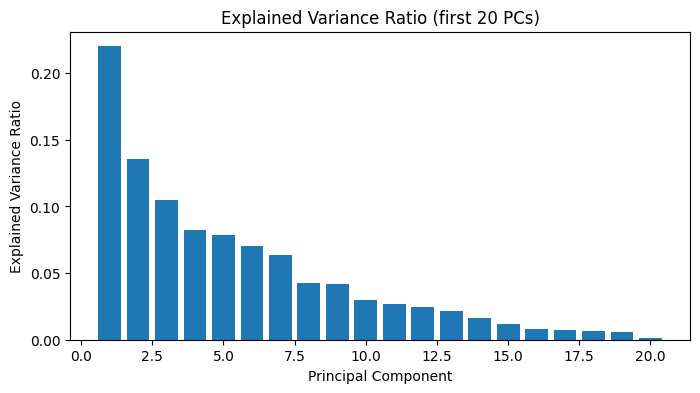

In [28]:
#  Bar plot of explained variance ratio (first 20 PCs)
plt.figure(figsize=(8,4))
plt.bar(range(1, min(21, len(explained_ratio)+1)), explained_ratio[:20])
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio (first 20 PCs)")
plt.show()


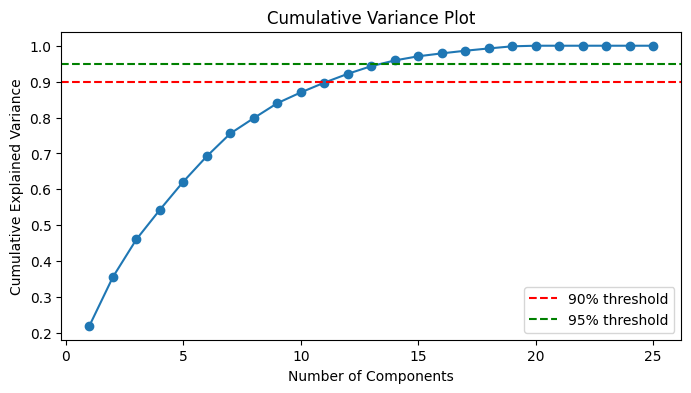

In [29]:
#  Cumulative variance plot
plt.figure(figsize=(8,4))
plt.plot(range(1, len(cumulative)+1), cumulative, marker="o")
plt.axhline(y=0.90, color="r", linestyle="--", label="90% threshold")
plt.axhline(y=0.95, color="g", linestyle="--", label="95% threshold")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Plot")
plt.legend()
plt.show()


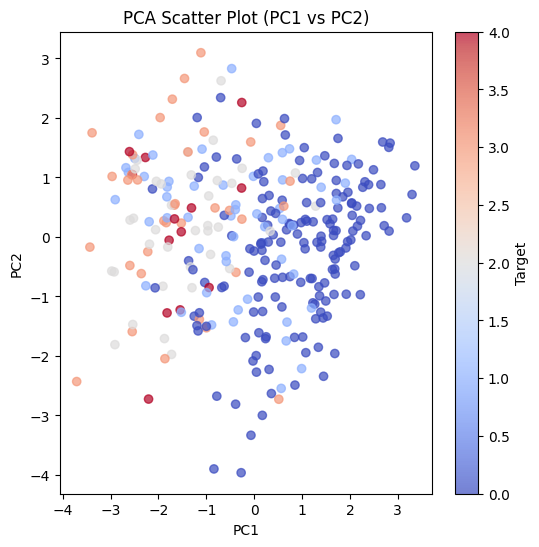

In [30]:
#  Scatter plot of first two principal components
plt.figure(figsize=(6,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["target"], cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.colorbar(label="Target")
plt.show()
